In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/date_tema_1_iaut_2024.csv")

In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,Public_Transportation,2,yes,no,"3,73",21,no,2474,3,Sometimes,"1,62",no,2,no,64,0,1,Female,D1
1,Public_Transportation,3,yes,no,"2,92",21,Sometimes,2429,3,Sometimes,"1,52",yes,3,yes,56,3,0,Female,D1
2,Public_Transportation,2,yes,no,"3,85",23,Frequently,2656,3,Sometimes,"1,8",no,2,no,77,2,1,Male,D1
3,Walking,3,no,no,"3,01",27,Frequently,2260,3,Sometimes,"1,8",no,2,no,-1,2,0,Male,D2
4,Public_Transportation,2,no,no,"2,73",22,Sometimes,1895,1,Sometimes,"1,78",no,2,no,"89,8",0,0,Male,D3


In [ ]:
df.isna().sum()

Transportation                  0
Regular_fiber_diet              0
Diagnostic_in_family_history    0
High_calorie_diet               0
Sedentary_hours_daily           0
Age                             0
Alcohol                         0
Est_avg_calorie_intake          0
Main_meals_daily                0
Snacks                          0
Height                          0
Smoker                          0
Water_daily                     0
Calorie_monitoring              0
Weight                          0
Physical_activity_level         0
Technology_time_use             0
Gender                          0
Diagnostic                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Transportation                1921 non-null   object
 1   Regular_fiber_diet            1921 non-null   object
 2   Diagnostic_in_family_history  1921 non-null   object
 3   High_calorie_diet             1921 non-null   object
 4   Sedentary_hours_daily         1921 non-null   object
 5   Age                           1921 non-null   object
 6   Alcohol                       1921 non-null   object
 7   Est_avg_calorie_intake        1921 non-null   int64 
 8   Main_meals_daily              1921 non-null   object
 9   Snacks                        1921 non-null   object
 10  Height                        1921 non-null   object
 11  Smoker                        1921 non-null   object
 12  Water_daily                   1921 non-null   object
 13  Calorie_monitoring

In [ ]:
df.describe()

,Est_avg_calorie_intake,Technology_time_use
count,1921.000000,1921.000000
mean,2253.687663,1.345653
std,434.075794,29.789928
min,1500.000000,0.000000
25%,1871.000000,0.000000
50%,2253.000000,1.000000
75%,2628.000000,1.000000
max,3000.000000,1306.000000


# 3.1. Explorarea Datelor (Exploratory Data Analysis) [4p]

## 1. Analiza echilibrului de clase


<ipython-input-56-dcc584ac5d91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnostic', data=df, palette='Set2')


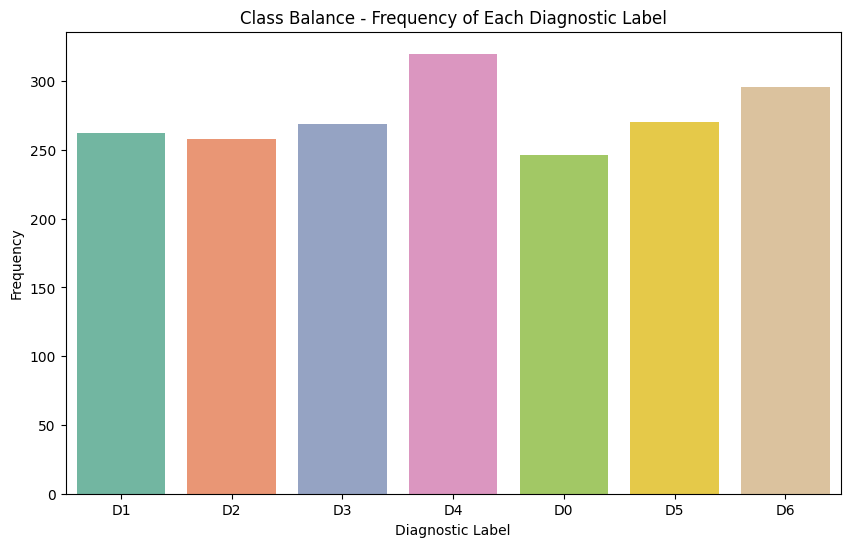

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnostic', data=df, palette='Set2')
plt.title('Class Balance - Frequency of Each Diagnostic Label')
plt.xlabel('Diagnostic Label')
plt.ylabel('Frequency')
plt.show()

## 2. Vizualizarea datelor

## Set correct type for columns values

In [ ]:
columns_to_convert = ['Regular_fiber_diet', 'Sedentary_hours_daily', 'Age', 'Main_meals_daily', 'Height', 'Water_daily', 'Weight',
                      'Physical_activity_level']

In [ ]:
def convert_comma_to_dot(df_column):
    return pd.to_numeric(df_column.str.replace(',', '.'))

In [ ]:
for col in columns_to_convert:
    df[col] = convert_comma_to_dot(df[col])

In [ ]:
df.dtypes

Transportation                   object
Regular_fiber_diet              float64
Diagnostic_in_family_history     object
High_calorie_diet                object
Sedentary_hours_daily           float64
Age                             float64
Alcohol                          object
Est_avg_calorie_intake            int64
Main_meals_daily                float64
Snacks                           object
Height                          float64
Smoker                           object
Water_daily                     float64
Calorie_monitoring               object
Weight                          float64
Physical_activity_level         float64
Technology_time_use               int64
Gender                           object
Diagnostic                       object
dtype: object

In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,Public_Transportation,2.0,yes,no,3.73,21.0,no,2474,3.0,Sometimes,1.62,no,2.0,no,64.0,0.0,1,Female,D1
1,Public_Transportation,3.0,yes,no,2.92,21.0,Sometimes,2429,3.0,Sometimes,1.52,yes,3.0,yes,56.0,3.0,0,Female,D1
2,Public_Transportation,2.0,yes,no,3.85,23.0,Frequently,2656,3.0,Sometimes,1.80,no,2.0,no,77.0,2.0,1,Male,D1
3,Walking,3.0,no,no,3.01,27.0,Frequently,2260,3.0,Sometimes,1.80,no,2.0,no,-1.0,2.0,0,Male,D2
4,Public_Transportation,2.0,no,no,2.73,22.0,Sometimes,1895,1.0,Sometimes,1.78,no,2.0,no,89.8,0.0,0,Male,D3


## Extract numercial and categorial atributes

In [ ]:
numerical_attributes = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_attributes

['Regular_fiber_diet',
 'Sedentary_hours_daily',
 'Age',
 'Est_avg_calorie_intake',
 'Main_meals_daily',
 'Height',
 'Water_daily',
 'Weight',
 'Physical_activity_level',
 'Technology_time_use']

In [ ]:
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()
categorical_attributes

['Transportation',
 'Diagnostic_in_family_history',
 'High_calorie_diet',
 'Alcohol',
 'Snacks',
 'Smoker',
 'Calorie_monitoring',
 'Gender',
 'Diagnostic']

## Statistics values extraction

In [ ]:
numerical_stats = df[numerical_attributes].describe().T
numerical_stats['max-min'] = numerical_stats['max'] - numerical_stats['min']  # max - min
numerical_stats['median'] = df[numerical_attributes].median()  # median
numerical_stats['iqr_range'] = df[numerical_attributes].quantile(0.75) - df[numerical_attributes].quantile(0.25)  # iar range
numerical_stats['mad'] = df[numerical_attributes].apply(median_abs_deviation)  # median abs dev

In [ ]:
numerical_stats

,count,mean,std,min,25%,50%,75%,max,max-min,median,iqr_range,mad
Regular_fiber_diet,1921.0,3.844937,62.439617,1.00,2.000000,2.387426,3.000000,2739.00,2738.00,2.387426,1.000000,0.387426
Sedentary_hours_daily,1921.0,3.693571,21.759835,2.21,2.770000,3.130000,3.640000,956.58,954.37,3.130000,0.870000,0.440000
Age,1921.0,44.792506,633.311837,15.00,19.971660,22.829753,26.000000,19685.00,19670.00,22.829753,6.028340,3.170247
Est_avg_calorie_intake,1921.0,2253.687663,434.075794,1500.00,1871.000000,2253.000000,2628.000000,3000.00,1500.00,2253.000000,757.000000,380.000000
Main_meals_daily,1921.0,2.683472,0.779179,1.00,2.658639,3.000000,3.000000,4.00,3.00,3.000000,0.341361,0.000000
Height,1921.0,3.573488,58.098160,1.45,1.630000,1.700000,1.770000,1915.00,1913.55,1.700000,0.140000,0.070000
Water_daily,1921.0,2.010367,0.611034,1.00,1.606076,2.000000,2.480555,3.00,2.00,2.000000,0.874479,0.444917
Weight,1921.0,205.637344,3225.653536,-1.00,58.830710,80.386078,105.036075,82628.00,82629.00,80.386078,46.205365,24.386078
Physical_activity_level,1921.0,1.012640,0.855526,0.00,0.115974,1.000000,1.683497,3.00,3.00,1.000000,1.567523,0.815768
Technology_time_use,1921.0,1.345653,29.789928,0.00,0.000000,1.000000,1.000000,1306.00,1306.00,1.000000,1.000000,1.000000


### Eliminate rows that contians oulayers vlaues based on the numerical above statistics

In [ ]:
outlayers_lines = set()

In [ ]:
#valori imposible pt age => outlayere => scot de tot aceste randuri / adica au max -min mare!!!!
df[df['Regular_fiber_diet'] > 3]

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
1598,Public_Transportation,2739.0,yes,yes,2.42,22.771001,Sometimes,1971,2.740492,Sometimes,1.87,no,1.824561,no,121.527369,1.094839,0,Male,D5


In [ ]:
df[df['Sedentary_hours_daily'] > 5]

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
801,Public_Transportation,2.0,yes,yes,956.58,18.0,no,2796,1.411685,Sometimes,1.65,no,1.859089,no,68.818893,0.0,1306,Female,D2


In [ ]:
df[df['Age'] > 70]

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
845,Public_Transportation,2.987148,yes,yes,3.51,19627.0,Sometimes,1842,3.483449,Sometimes,1.82,no,2.359246,no,85.302146,2.060415,1,Male,D2
878,Public_Transportation,2.153639,yes,yes,2.99,19685.0,Sometimes,2663,3.715148,Sometimes,1.84,no,2.703337,no,89.496905,2.000000,0,Male,D2


In [ ]:
df[df['Height'] > 2]

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
1326,Public_Transportation,2.387426,yes,yes,3.77,18.000000,Sometimes,1924,3.0,Sometimes,1683.0,no,1.779620,no,90.924208,0.743005,1,Female,D4
1523,Public_Transportation,2.108638,yes,yes,3.06,30.684347,Sometimes,1612,3.0,Sometimes,1915.0,yes,1.014876,no,129.966428,0.987521,0,Male,D5


In [ ]:
df[df['Technology_time_use'] > 2]

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
801,Public_Transportation,2.0,yes,yes,956.58,18.0,no,2796,1.411685,Sometimes,1.65,no,1.859089,no,68.818893,0.0,1306,Female,D2


In [ ]:
df[df['Weight'] > 170]

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
924,Public_Transportation,2.000000,yes,yes,4.59,22.000000,Sometimes,1581,2.038373,Sometimes,1.69,no,2.000000,no,80539.0,2.708250,2,Male,D3
1177,Public_Transportation,2.060922,yes,yes,3.15,23.000000,no,1855,2.933409,Sometimes,1.63,no,2.235282,no,82628.0,0.380633,0,Female,D4
1375,Public_Transportation,2.765330,yes,yes,3.94,18.945961,no,2857,3.000000,Sometimes,1.61,no,1.048584,no,82039.0,0.192559,1,Female,D4


In [ ]:
df = df.drop([1598, 801, 845, 878, 1326, 1523, 924, 1177, 1375])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1912 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1912 non-null   object 
 1   Regular_fiber_diet            1912 non-null   float64
 2   Diagnostic_in_family_history  1912 non-null   object 
 3   High_calorie_diet             1912 non-null   object 
 4   Sedentary_hours_daily         1912 non-null   float64
 5   Age                           1912 non-null   float64
 6   Alcohol                       1912 non-null   object 
 7   Est_avg_calorie_intake        1912 non-null   int64  
 8   Main_meals_daily              1912 non-null   float64
 9   Snacks                        1912 non-null   object 
 10  Height                        1912 non-null   float64
 11  Smoker                        1912 non-null   object 
 12  Water_daily                   1912 non-null   float64
 13  Calorie_

## Extract discrete / nominal / ordinal attributes:

In [ ]:
nominal_attributes = ['Transportation',
                    'Diagnostic_in_family_history',
                    'High_calorie_diet',
                    'Smoker',
                    'Calorie_monitoring',
                    'Gender',
                    'Diagnostic']

In [ ]:
ordinal_attributes = ['Alcohol', 'Snacks']

In [ ]:
nominal_ord_attributes = nominal_attributes + ordinal_attributes

In [ ]:
nominal_ord_attributes

['Transportation',
 'Diagnostic_in_family_history',
 'High_calorie_diet',
 'Smoker',
 'Calorie_monitoring',
 'Gender',
 'Diagnostic',
 'Alcohol',
 'Snacks']

### Unique values for nominal/oridnal attributes

In [ ]:
# Unique values for discrete/nominal/ordinal attributes
unique_values = {col: df[col].unique() for col in nominal_ord_attributes}
unique_values

{'Transportation': array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
        'Bike'], dtype=object),
 'Diagnostic_in_family_history': array(['yes', 'no'], dtype=object),
 'High_calorie_diet': array(['no', 'yes'], dtype=object),
 'Smoker': array(['no', 'yes'], dtype=object),
 'Calorie_monitoring': array(['no', 'yes'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Diagnostic': array(['D1', 'D2', 'D3', 'D4', 'D0', 'D5', 'D6'], dtype=object),
 'Alcohol': array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object),
 'Snacks': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)}

### Histogram for each nominal/oridnal attribute to show distribution of categories

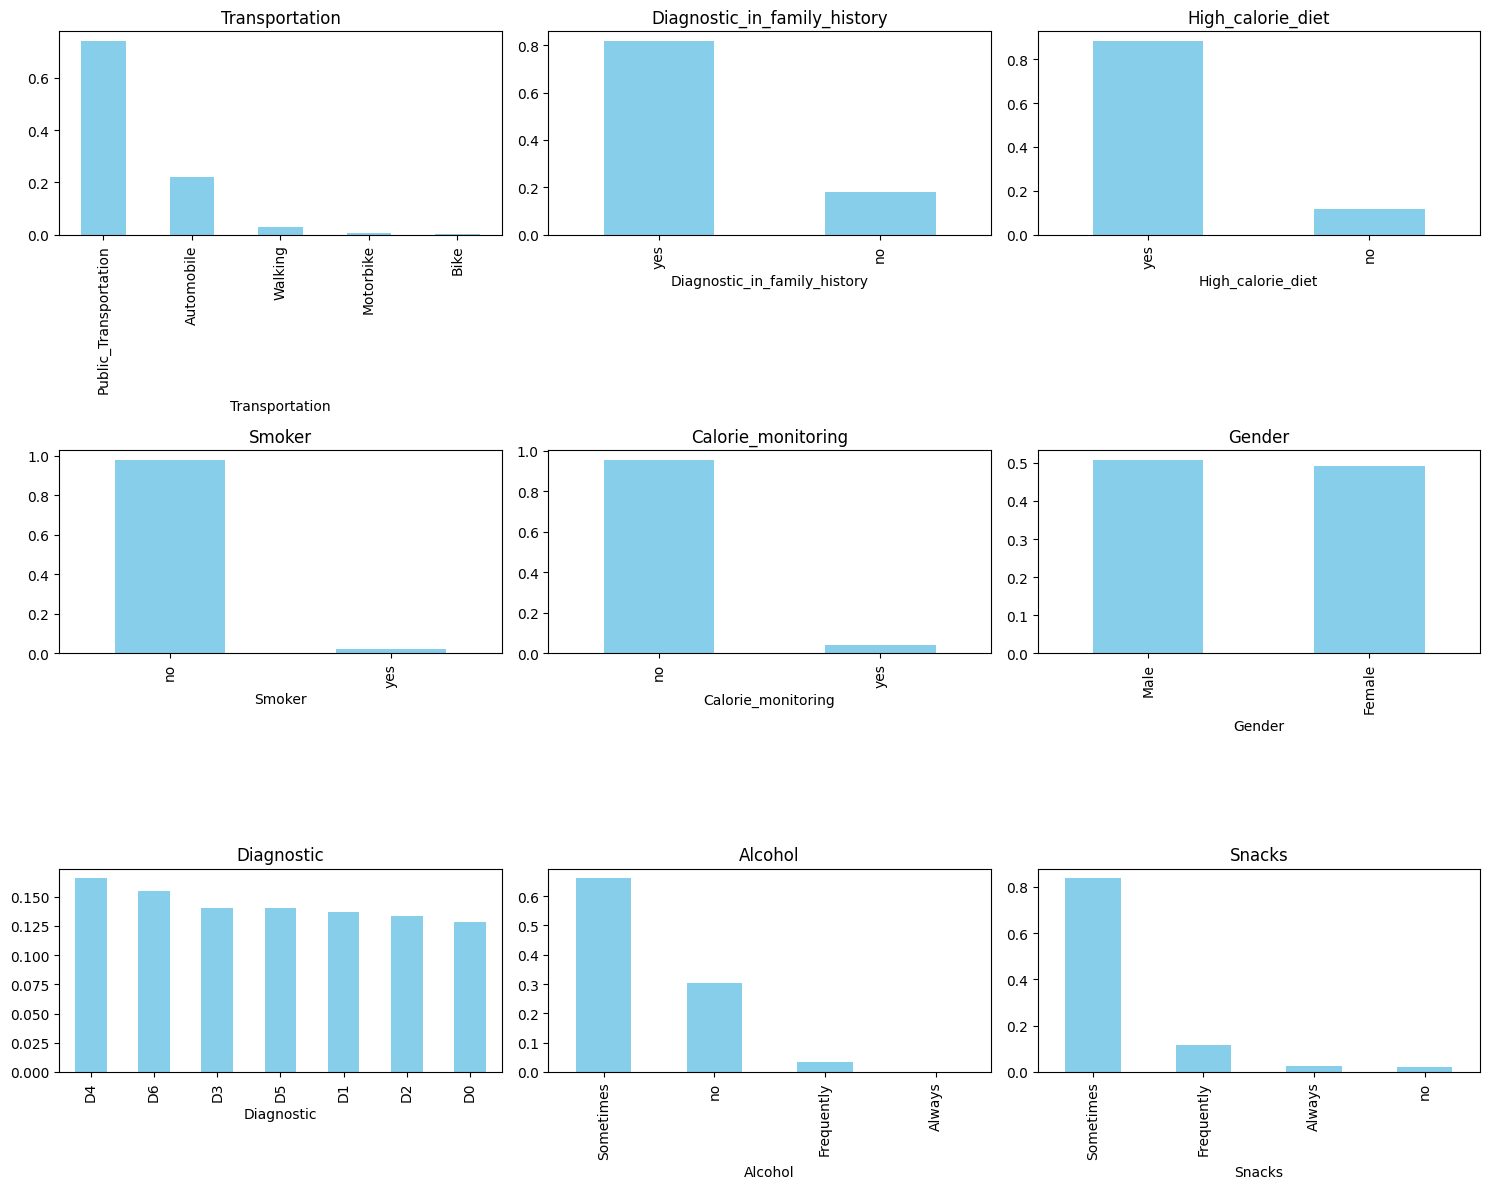

In [ ]:
# Histogram for each attribute to show distribution of categories
plt.figure(figsize=(15, 12))

for i, col in enumerate(nominal_ord_attributes, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts(normalize=True).plot(kind='bar', color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

## Covariance analyze

In [ ]:
le = LabelEncoder()
# df['Diagnostic_encoded'] = le.fit_transform(df['Diagnostic'])
for attribute in categorical_attributes:
    df[attribute] = le.fit_transform(df[attribute])

numerical_attributes_with_class = numerical_attributes + ['Diagnostic']
# numerical_attributes_with_class = numerical_attributes + ['Diagnostic_encoded']

covariance_matrix = df[numerical_attributes_with_class].cov()

print(covariance_matrix)

                         Regular_fiber_diet  Sedentary_hours_daily        Age  \
Regular_fiber_diet                 0.284929              -0.020117   0.033474   
Sedentary_hours_daily             -0.020117               0.331005  -0.851800   
Age                                0.033474              -0.851800  41.145007   
Est_avg_calorie_intake            -8.454172               4.748200 -74.070591   
Main_meals_daily                   0.016829               0.019928  -0.252061   
Height                            -0.001730               0.002834  -0.014755   
Water_daily                        0.025069               0.004448  -0.208689   
Weight                             2.434263              -0.922714  31.676022   
Physical_activity_level            0.011128               0.025976  -0.824302   
Technology_time_use               -0.030306               0.336334  -1.249913   
Diagnostic                         0.234721              -0.082299   3.555325   

                         Es

In [ ]:
covariance_matrix

,Regular_fiber_diet,Sedentary_hours_daily,Age,Est_avg_calorie_intake,Main_meals_daily,Height,Water_daily,Weight,Physical_activity_level,Technology_time_use,Diagnostic
Regular_fiber_diet,0.284929,-0.020117,0.033474,-8.454172,0.016829,-0.001730,0.025069,2.434263,0.011128,-0.030306,0.234721
Sedentary_hours_daily,-0.020117,0.331005,-0.851800,4.748200,0.019928,0.002834,0.004448,-0.922714,0.025976,0.336334,-0.082299
Age,0.033474,-0.851800,41.145007,-74.070591,-0.252061,-0.014755,-0.208689,31.676022,-0.824302,-1.249913,3.555325
Est_avg_calorie_intake,-8.454172,4.748200,-74.070591,188153.937212,-4.388232,-2.175417,-4.354435,-856.124155,-0.763919,2.708113,-31.893007
Main_meals_daily,0.016829,0.019928,-0.252061,-4.388232,0.607831,0.018361,0.032362,2.379110,0.094902,0.021010,0.039706
Height,-0.001730,0.002834,-0.014755,-2.175417,0.018361,0.008688,0.012827,0.990492,0.023466,0.003510,0.024250
Water_daily,0.025069,0.004448,-0.208689,-4.354435,0.032362,0.012827,0.373719,3.351208,0.088905,0.003133,0.168877
Weight,2.434263,-0.922714,31.676022,-856.124155,2.379110,0.990492,3.351208,1310.413160,-1.492055,-1.335703,43.504124
Physical_activity_level,0.011128,0.025976,-0.824302,-0.763919,0.094902,0.023466,0.088905,-1.492055,0.731642,0.039367,-0.335974
Technology_time_use,-0.030306,0.336334,-1.249913,2.708113,0.021010,0.003510,0.003133,-1.335703,0.039367,0.455840,-0.111594


In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,2.0,1,0,3.73,21.0,3,2474,3.0,2,1.62,0,2.0,0,64.0,0.0,1,0,1
1,3,3.0,1,0,2.92,21.0,2,2429,3.0,2,1.52,1,3.0,1,56.0,3.0,0,0,1
2,3,2.0,1,0,3.85,23.0,1,2656,3.0,2,1.80,0,2.0,0,77.0,2.0,1,1,1
3,4,3.0,0,0,3.01,27.0,1,2260,3.0,2,1.80,0,2.0,0,-1.0,2.0,0,1,2
4,3,2.0,0,0,2.73,22.0,2,1895,1.0,2,1.78,0,2.0,0,89.8,0.0,0,1,3


# 3.2. Extragerea manuală a atributelor și utilizarea algoritmilor clasici de Învățare Automată [6p]

## Tratare valori lipsa weight


In [ ]:
(df['Weight'] == -1).sum()

190

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df['Weight'] = df['Weight'].replace(-1, np.nan).astype(float)
imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
df['Weight'] = imputer.fit_transform(df[['Weight']])

In [ ]:
(df['Weight'] == -1).sum()

0

## Data standardization

In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,2.0,1,0,3.73,21.0,3,2474,3.0,2,1.62,0,2.0,0,64.000000,0.0,1,0,1
1,3,3.0,1,0,2.92,21.0,2,2429,3.0,2,1.52,1,3.0,1,56.000000,3.0,0,0,1
2,3,2.0,1,0,3.85,23.0,1,2656,3.0,2,1.80,0,2.0,0,77.000000,2.0,1,1,1
3,4,3.0,0,0,3.01,27.0,1,2260,3.0,2,1.80,0,2.0,0,86.775437,2.0,0,1,2
4,3,2.0,0,0,2.73,22.0,2,1895,1.0,2,1.78,0,2.0,0,89.800000,0.0,0,1,3


In [ ]:
df.to_csv("/content/patients.csv")

In [ ]:
scaler = MinMaxScaler()
df[numerical_attributes] = scaler.fit_transform(df[numerical_attributes])

In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,0.5,1,0,0.617886,0.130435,3,0.649333,0.666667,2,0.320755,0,0.5,0,0.198323,0.000000,0.5,0,1
1,3,1.0,1,0,0.288618,0.130435,2,0.619333,0.666667,2,0.132075,1,1.0,1,0.134859,1.000000,0.0,0,1
2,3,0.5,1,0,0.666667,0.173913,1,0.770667,0.666667,2,0.660377,0,0.5,0,0.301450,0.666667,0.5,1,1
3,4,1.0,0,0,0.325203,0.260870,1,0.506667,0.666667,2,0.660377,0,0.5,0,0.378998,0.666667,0.0,1,2
4,3,0.5,0,0,0.211382,0.152174,2,0.263333,0.000000,2,0.622642,0,0.5,0,0.402991,0.000000,0.0,1,3


## Feature selection

In [ ]:
df.describe()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000
mean,2.350941,0.710424,0.817992,0.882845,0.400938,0.203532,2.268828,0.502871,0.560953,1.856695,0.475803,0.020397,0.505515,0.043410,0.378998,0.337363,0.333159,0.508368,3.117155
std,1.272319,0.266894,0.385952,0.321689,0.233874,0.139444,0.518533,0.289178,0.259878,0.466981,0.175865,0.141393,0.305663,0.203832,0.197610,0.285120,0.337580,0.500061,1.986843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.500000,1.000000,1.000000,0.227642,0.108212,2.000000,0.248000,0.552866,2.000000,0.339623,0.000000,0.302788,0.000000,0.234438,0.038400,0.000000,0.000000,1.000000
50%,3.000000,0.696211,1.000000,1.000000,0.373984,0.170238,2.000000,0.502333,0.666667,2.000000,0.471698,0.000000,0.500000,0.000000,0.378998,0.333333,0.500000,1.000000,3.000000
75%,3.000000,1.000000,1.000000,1.000000,0.578252,0.239130,3.000000,0.752000,0.666667,2.000000,0.603774,0.000000,0.741227,0.000000,0.523705,0.561019,0.500000,1.000000,5.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
variances = df[numerical_attributes].var()

# Display variances
print("Variances of each numerical feature:")
print(variances)

Variances of each numerical feature:
Regular_fiber_diet         0.071232
Sedentary_hours_daily      0.054697
Age                        0.019445
Est_avg_calorie_intake     0.083624
Main_meals_daily           0.067537
Height                     0.030928
Water_daily                0.093430
Weight                     0.039050
Physical_activity_level    0.081294
Technology_time_use        0.113960
dtype: float64


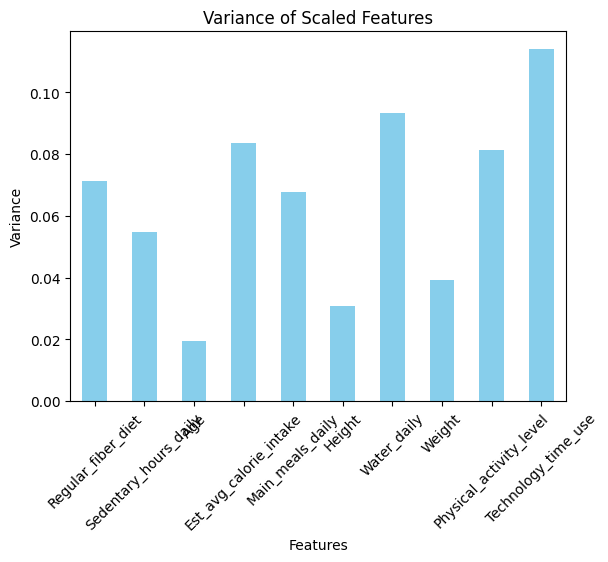

In [ ]:
# Creating a bar plot of the variances
variances.plot(kind='bar', color='skyblue')
plt.title('Variance of Scaled Features')
plt.ylabel('Variance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_numerical = df[numerical_attributes]

selector = VarianceThreshold(threshold=0.02)
df_reduced = selector.fit_transform(df_numerical)

# df_reduced = pd.DataFrame(df_reduced, columns=[numerical_attributes[i] for i in selector.get_support(indices=True)])

# df_final = pd.concat([df_reduced, df.drop(columns=numerical_attributes)], axis=1)
df_reduced = pd.DataFrame(df_reduced, columns=[numerical_attributes[i] for i in selector.get_support(indices=True)])
df_reduced.reset_index(drop=True, inplace=True)


df_non_numerical = df.drop(columns=numerical_attributes)
df_non_numerical.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df_final = pd.concat([df_reduced, df_non_numerical], axis=1)


In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,0.5,1,0,0.617886,0.130435,3,0.649333,0.666667,2,0.320755,0,0.5,0,0.198323,0.000000,0.5,0,1
1,3,1.0,1,0,0.288618,0.130435,2,0.619333,0.666667,2,0.132075,1,1.0,1,0.134859,1.000000,0.0,0,1
2,3,0.5,1,0,0.666667,0.173913,1,0.770667,0.666667,2,0.660377,0,0.5,0,0.301450,0.666667,0.5,1,1
3,4,1.0,0,0,0.325203,0.260870,1,0.506667,0.666667,2,0.660377,0,0.5,0,0.378998,0.666667,0.0,1,2
4,3,0.5,0,0,0.211382,0.152174,2,0.263333,0.000000,2,0.622642,0,0.5,0,0.402991,0.000000,0.0,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1912 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1912 non-null   int64  
 1   Regular_fiber_diet            1912 non-null   float64
 2   Diagnostic_in_family_history  1912 non-null   int64  
 3   High_calorie_diet             1912 non-null   int64  
 4   Sedentary_hours_daily         1912 non-null   float64
 5   Age                           1912 non-null   float64
 6   Alcohol                       1912 non-null   int64  
 7   Est_avg_calorie_intake        1912 non-null   float64
 8   Main_meals_daily              1912 non-null   float64
 9   Snacks                        1912 non-null   int64  
 10  Height                        1912 non-null   float64
 11  Smoker                        1912 non-null   int64  
 12  Water_daily                   1912 non-null   float64
 13  Calorie_

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Regular_fiber_diet            1912 non-null   float64
 1   Sedentary_hours_daily         1912 non-null   float64
 2   Est_avg_calorie_intake        1912 non-null   float64
 3   Main_meals_daily              1912 non-null   float64
 4   Height                        1912 non-null   float64
 5   Water_daily                   1912 non-null   float64
 6   Weight                        1912 non-null   float64
 7   Physical_activity_level       1912 non-null   float64
 8   Technology_time_use           1912 non-null   float64
 9   Transportation                1912 non-null   int64  
 10  Diagnostic_in_family_history  1912 non-null   int64  
 11  High_calorie_diet             1912 non-null   int64  
 12  Alcohol                       1912 non-null   int64  
 13  Sna

## Bold function

In [ ]:
def bold_df(columns, target_df):
    max_values = []
    for col in columns:
        max_values.append(target_df[col].max())

    target_df = target_df.style.apply(lambda x: ["font-weight: bold" if v in max_values else "" for v in x], subset=columns)
    return target_df

## Train test split data

In [ ]:
X = df_final.drop('Diagnostic', axis=1)
y = df_final['Diagnostic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Echilibru clase, set antrenare

<ipython-input-64-3aa5af41df6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnostic', data=X_train_cp, palette='Set2')


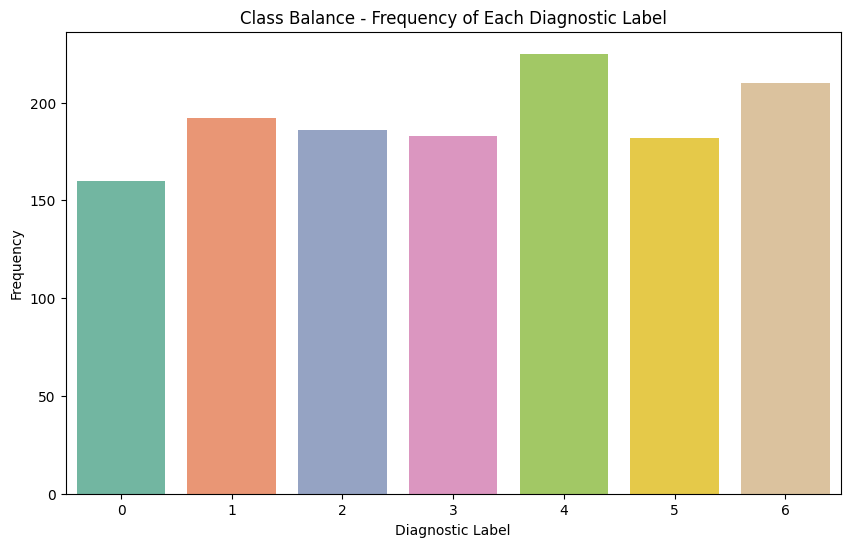

In [ ]:
X_train_cp = X_train.copy()
X_train_cp['Diagnostic'] = y_train

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnostic', data=X_train_cp, palette='Set2')
plt.title('Class Balance - Frequency of Each Diagnostic Label')
plt.xlabel('Diagnostic Label')
plt.ylabel('Frequency')
plt.show()

### Echilibru clase, set testare

<ipython-input-65-c7ea23dccbf0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnostic', data=X_test_cp, palette='Set2')


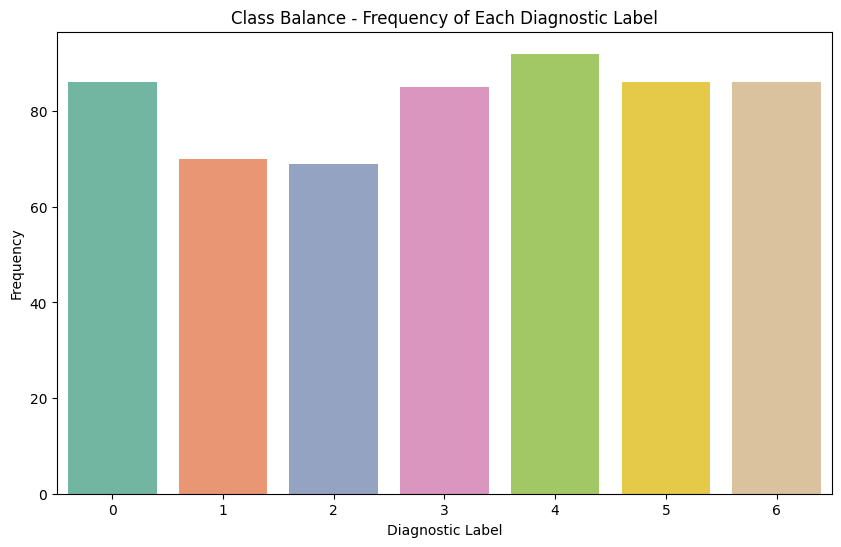

In [ ]:
X_test_cp = X_test.copy()
X_test_cp['Diagnostic'] = y_test

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnostic', data=X_test_cp, palette='Set2')
plt.title('Class Balance - Frequency of Each Diagnostic Label')
plt.xlabel('Diagnostic Label')
plt.ylabel('Frequency')
plt.show()

## Model core

In [ ]:
def model_build(estimator, parameters):
    columns = [
        'params', 'mean_f1', 'mean_precison', 'mean_recall', 'var_f1', 'var_precison', 'var_recall'
    ]

    scoring = {
        'f1': make_scorer(f1_score, average='macro'),
        'precision': make_scorer(precision_score, average='macro'),
        'recall': make_scorer(recall_score, average='macro')
    }
    clf = GridSearchCV(estimator, parameters, cv=3, scoring=scoring, refit='f1')  # Use 'macro' or 'weighted'
    clf.fit(X_train, y_train)

    results = pd.DataFrame(clf.cv_results_)
    performance_df = pd.DataFrame(columns=columns)
    for i in range(len(results)):
        metrics_data = {
                'params': results.loc[i, 'params'],
                'mean_f1': results.loc[i, 'mean_test_f1'],
                'mean_precison': results.loc[i, 'mean_test_precision'],
                'mean_recall': results.loc[i, 'mean_test_recall'],
                'var_f1': results.loc[i, 'std_test_f1'] ** 2,
                'var_precison': results.loc[i, 'std_test_precision'] ** 2,
                'var_recall': results.loc[i, 'std_test_recall'] ** 2,
            }
        temp_df = pd.DataFrame([metrics_data])
        performance_df = pd.concat([performance_df, temp_df], ignore_index=True)
    return clf, performance_df


## Compute confusion matrix best model

In [ ]:
def print_conf_matrix(clf):
    best_model = clf.best_estimator_
    print("Cel mai bun model", best_model)
    y_pred = best_model.predict(X_test)
    class_wise_f1 = f1_score(y_test, y_pred, average=None)
    class_wise_precision = precision_score(y_test, y_pred, average=None)
    class_wise_recall = recall_score(y_test, y_pred, average=None)

    # Print class-wise scores
    print("Class-wise F1 scores:", class_wise_f1)
    print("Class-wise Precision scores:", class_wise_precision)
    print("Class-wise Recall scores:", class_wise_recall)

    conf_mat = confusion_matrix(y_test, y_pred)
    print("Matricea de confuzie pentru cel mai bun model:")
    print(conf_mat)

## SVM

### Model build and results

In [ ]:
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 10, 100]}
clf, perf_df = model_build(SVC(), parameters)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
perf_svm_bold_df = bold_df(list(perf_df.columns)[1:], perf_df)

In [ ]:
perf_svm_bold_df

,params,mean_f1,mean_precison,mean_recall,var_f1,var_precison,var_recall
0,"{'C': 1, 'kernel': 'linear'}",0.651878,0.656376,0.659438,0.000569,0.000474,0.000525
1,"{'C': 1, 'kernel': 'rbf'}",0.619112,0.634954,0.637404,0.000262,0.000282,0.000302
2,"{'C': 1, 'kernel': 'poly'}",0.708546,0.707822,0.713093,0.000104,0.000100,0.000074
3,"{'C': 1, 'kernel': 'sigmoid'}",0.179021,0.314674,0.255221,0.000600,0.011048,0.000645
4,"{'C': 10, 'kernel': 'linear'}",0.786051,0.789469,0.787366,0.000099,0.000127,0.000112
5,"{'C': 10, 'kernel': 'rbf'}",0.746089,0.745946,0.748805,0.000316,0.000350,0.000329
6,"{'C': 10, 'kernel': 'poly'}",0.780112,0.783807,0.782343,0.000191,0.000263,0.000210
7,"{'C': 10, 'kernel': 'sigmoid'}",0.236749,0.287377,0.246373,0.000301,0.000205,0.000498
8,"{'C': 100, 'kernel': 'linear'}",0.821056,0.824505,0.821653,0.000470,0.000553,0.000476
9,"{'C': 100, 'kernel': 'rbf'}",0.806892,0.811541,0.807563,0.000059,0.000082,0.000081


### Confusion matrix

In [ ]:
print_conf_matrix(clf)

Cel mai bun model SVC(C=100, kernel='linear')
Class-wise F1 scores: [0.85207101 0.72592593 0.76595745 0.78651685 0.81142857 0.90285714
 0.97142857]
Class-wise Precision scores: [0.86746988 0.75384615 0.75       0.75268817 0.85542169 0.88764045
 0.95505618]
Class-wise Recall scores: [0.8372093  0.7        0.7826087  0.82352941 0.77173913 0.91860465
 0.98837209]
Matricea de confuzie pentru cel mai bun model:
[[72  5  2  4  2  0  1]
 [11 49  6  3  1  0  0]
 [ 0  8 54  4  2  0  1]
 [ 0  3  9 70  3  0  0]
 [ 0  0  1  9 71 10  1]
 [ 0  0  0  3  3 79  1]
 [ 0  0  0  0  1  0 85]]


## RandomForest

### Model build and results

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'max_samples': [0.6, 0.8, 1.0]
}
clf, perf_df = model_build(RandomForestClassifier(), parameters)

In [ ]:
perf_svm_bold_df = bold_df(list(perf_df.columns)[1:], perf_df)

In [ ]:
perf_svm_bold_df

,params,mean_f1,mean_precison,mean_recall,var_f1,var_precison,var_recall
0,"{'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 100}",0.862579,0.870617,0.860485,0.000282,0.000265,0.000287
1,"{'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 200}",0.860576,0.867210,0.858783,0.000128,0.000119,0.000134
2,"{'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 300}",0.853618,0.861230,0.852005,0.000164,0.000121,0.000162
3,"{'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 400}",0.860521,0.867519,0.859440,0.000387,0.000378,0.000400
4,"{'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 100}",0.861723,0.873103,0.859331,0.000175,0.000214,0.000161
5,"{'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 200}",0.872310,0.878577,0.870916,0.000212,0.000168,0.000220
6,"{'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 300}",0.861691,0.870419,0.859559,0.000139,0.000140,0.000138
7,"{'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 400}",0.863786,0.872665,0.861689,0.000271,0.000292,0.000248
8,"{'max_depth': 10, 'max_samples': 1.0, 'n_estimators': 100}",0.861838,0.868921,0.859424,0.000160,0.000162,0.000154
9,"{'max_depth': 10, 'max_samples': 1.0, 'n_estimators': 200}",0.867175,0.875128,0.865746,0.000159,0.000126,0.000174


### Confusion matrix

In [ ]:
print_conf_matrix(clf)

Cel mai bun model RandomForestClassifier(max_depth=30, max_samples=1.0, n_estimators=400)
Class-wise F1 scores: [0.87341772 0.78980892 0.85074627 0.84848485 0.92972973 0.96
 0.98850575]
Class-wise Precision scores: [0.95833333 0.71264368 0.87692308 0.875      0.92473118 0.94382022
 0.97727273]
Class-wise Recall scores: [0.80232558 0.88571429 0.82608696 0.82352941 0.93478261 0.97674419
 1.        ]
Matricea de confuzie pentru cel mai bun model:
[[69 12  2  1  2  0  0]
 [ 3 62  3  2  0  0  0]
 [ 0  8 57  2  0  1  1]
 [ 0  4  3 70  5  3  0]
 [ 0  1  0  4 86  1  0]
 [ 0  0  0  1  0 84  1]
 [ 0  0  0  0  0  0 86]]


## ExtraTrees

### Model build and results

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'max_samples': [0.6, 0.8, 1.0],
    'bootstrap' : [True]
}
clf, perf_df = model_build(ExtraTreesClassifier(), parameters)

In [ ]:
perf_svm_bold_df = bold_df(list(perf_df.columns)[1:], perf_df)

In [ ]:
perf_svm_bold_df

,params,mean_f1,mean_precison,mean_recall,var_f1,var_precison,var_recall
0,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 100}",0.831990,0.835731,0.834869,0.000069,0.000048,0.000053
1,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 200}",0.830779,0.835556,0.833545,0.000039,0.000012,0.000041
2,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 300}",0.839966,0.843305,0.842031,0.000027,0.000036,0.000023
3,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 400}",0.835412,0.839607,0.837304,0.000002,0.000008,0.000003
4,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 100}",0.835990,0.843516,0.837815,0.000121,0.000148,0.000105
5,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 200}",0.837191,0.842409,0.839552,0.000126,0.000096,0.000107
6,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 300}",0.837123,0.843060,0.838446,0.000040,0.000049,0.000037
7,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 400}",0.837924,0.844266,0.838471,0.000231,0.000243,0.000237
8,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 1.0, 'n_estimators': 100}",0.839002,0.845755,0.840623,0.000163,0.000085,0.000177
9,"{'bootstrap': True, 'max_depth': 10, 'max_samples': 1.0, 'n_estimators': 200}",0.840712,0.845477,0.842202,0.000017,0.000031,0.000023


### Confusion matrix

In [ ]:
print_conf_matrix(clf)

Cel mai bun model ExtraTreesClassifier(bootstrap=True, max_samples=0.8, n_estimators=400)
Class-wise F1 scores: [0.87179487 0.76315789 0.74074074 0.81176471 0.90322581 0.96551724
 0.97142857]
Class-wise Precision scores: [0.97142857 0.70731707 0.75757576 0.81176471 0.89361702 0.95454545
 0.95505618]
Class-wise Recall scores: [0.79069767 0.82857143 0.72463768 0.81176471 0.91304348 0.97674419
 0.98837209]
Matricea de confuzie pentru cel mai bun model:
[[68 10  3  1  3  1  0]
 [ 2 58  6  3  1  0  0]
 [ 0  9 50  7  1  1  1]
 [ 0  3  6 69  5  2  0]
 [ 0  2  1  3 84  0  2]
 [ 0  0  0  1  0 84  1]
 [ 0  0  0  1  0  0 85]]


## GradientBoostedTrees

### Model build and results

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'learning_rate': [0.01, 0.1, 0.2]
}
clf, perf_df = model_build(XGBClassifier(), parameters)

In [ ]:
perf_svm_bold_df = bold_df(list(perf_df.columns)[1:], perf_df)

In [ ]:
perf_svm_bold_df

,params,mean_f1,mean_precison,mean_recall,var_f1,var_precison,var_recall
0,"{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}",0.837938,0.841115,0.837805,0.000015,0.000040,0.000005
1,"{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}",0.864044,0.865428,0.864173,0.000003,0.000011,0.000001
2,"{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300}",0.865442,0.867795,0.865116,0.000071,0.000077,0.000051
3,"{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}",0.866596,0.869254,0.866251,0.000032,0.000032,0.000023
4,"{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100}",0.840341,0.843075,0.840541,0.000039,0.000053,0.000018
5,"{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200}",0.856669,0.858139,0.857048,0.000016,0.000030,0.000013
6,"{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 300}",0.864584,0.866175,0.864885,0.000031,0.000031,0.000021
7,"{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 400}",0.868443,0.870485,0.868469,0.000028,0.000032,0.000018
8,"{'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}",0.840341,0.843075,0.840541,0.000039,0.000053,0.000018
9,"{'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}",0.856669,0.858139,0.857048,0.000016,0.000030,0.000013


### Confusion matrix

In [ ]:
print_conf_matrix(clf)

Cel mai bun model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Class-wise F1 scores: [0.88888889 0.87769784 0.89051095 0.89570552 0.91752577 0.96
 0.96629213]
Class-wise Precision scores: [0.94736842 0.88405797 0.89705882 0.93589744 0.87254902 0.94382022
 0.93478261]
Class-wise R